# AT3 Group 8 - Regression Model

## Business Objective

The primary objective of this business-oriented project is to construct a regression model that can aid customers in effectively managing their financial resources by accurately predicting their total spending amount for the upcoming month. The developed model serves as a valuable tool to empower individuals in budgeting their finances more efficiently and making informed decisions regarding their expenditures.

Through this business project, we aspire to equip customers with valuable insights that can guide their budgeting strategies, thereby promoting financial stability and empowering them to achieve their financial goals effectively.

In this experimental study, our objective is to identify the most accurate regression models for predicting customers' total spending amount for the upcoming month. A total of 7 regression models will be trained and evaluated, encompassing a range of diverse techniques. The selected models are as follows:
1. Linear regression
2. LASSO regression
3. Ridge Regression
4. Elastic Net
5. Decision tree
6. Random Forest Regressor
7. Gradient Boosting

By exploring these diverse regression models, we aim to determine the optimal approach for accurate prediction of customers' total spending, which can have valuable implications for business planning and resource allocation.

# 1.Load and Explore dataset

Import Libaries

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

Import CSV file

In [2]:
df = pd.read_csv('txn_df.csv')

# 2.Data Exploration

In [3]:
df.head()

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp,gender,city,state,zip,lat,long,city_pop,job,age
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522,2019-05-24 10:39:10-07:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359,2019-09-25 08:31:59-07:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327,2019-12-24 08:40:01-08:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342,2019-10-18 12:50:38-07:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434,2019-02-10 15:13:20-08:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0


In [4]:
# Assuming your timestamp column is named 'timestamp'
df['timestamp'] = pd.to_datetime(df['timestamp'])

# Finding the first and last dates recorded
first_date = df['timestamp'].min().date()
last_date = df['timestamp'].max().date()

# Displaying the results
print("First Date:", first_date)
print("Last Date:", last_date)

First Date: 2018-12-31
Last Date: 2022-12-31


In [5]:
df.columns

Index(['cc_num', 'acct_num', 'trans_num', 'category', 'amt', 'is_fraud',
       'merchant', 'merch_lat', 'merch_long', 'timestamp', 'gender', 'city',
       'state', 'zip', 'lat', 'long', 'city_pop', 'job', 'age'],
      dtype='object')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4260904 entries, 0 to 4260903
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   acct_num    int64  
 2   trans_num   object 
 3   category    object 
 4   amt         float64
 5   is_fraud    int64  
 6   merchant    object 
 7   merch_lat   float64
 8   merch_long  float64
 9   timestamp   object 
 10  gender      object 
 11  city        object 
 12  state       object 
 13  zip         int64  
 14  lat         float64
 15  long        float64
 16  city_pop    int64  
 17  job         object 
 18  age         float64
dtypes: float64(6), int64(5), object(8)
memory usage: 617.7+ MB


In [7]:
df.shape

(4260904, 19)

In [8]:
df.isna().sum()

cc_num        0
acct_num      0
trans_num     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
timestamp     0
gender        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
age           0
dtype: int64

In [9]:
df_stats = pd.DataFrame(columns = ['column', 'values', 'values_count_incna', 'values_count_nona', 
                                       'num_miss', 'pct_miss'])
tmp = pd.DataFrame()

for c in df.columns:
    tmp['column'] = [c]
    tmp['values'] = [df[c].unique()]
    tmp['values_count_incna'] = len(list(df[c].unique()))
    tmp['values_count_nona'] = int(df[c].nunique())
    tmp['num_miss'] = df[c].isnull().sum()
    tmp['pct_miss'] = (df[c].isnull().sum()/ len(df)).round(3)*100
    df_stats = df_stats.append(tmp)
    
df_stats

,column,values,values_count_incna,values_count_nona,num_miss,pct_miss
0,cc_num,"[4218196001337, 4238849696532874, 357346706562...",983,983,0,0.0
0,acct_num,"[888022315787, 947268892251, 370770979513, 636...",983,983,0,0.0
0,trans_num,"[91ab12e73ef38206e1121e9648d2408d, 071553d533a...",4260904,4260904,0,0.0
0,category,"[gas_transport, grocery_pos, misc_net, misc_po...",14,14,0,0.0
0,amt,"[69.12, 68.11, 40.35, 96.22, 71.89, 73.58, 57....",81218,81218,0,0.0
0,is_fraud,"[0, 1]",2,2,0,0.0
0,merchant,"[Phillips Group, Tucker Ltd, Dixon PLC, Lamber...",21977,21977,0,0.0
0,merch_lat,"[39.491416, 40.890319, 39.244958, 39.656925, 4...",3767589,3767589,0,0.0
0,merch_long,"[-75.588522, -75.573359, -74.475327, -75.80234...",4031685,4031685,0,0.0
0,timestamp,"[2019-05-24 10:39:10-07:00, 2019-09-25 08:31:5...",4114752,4114752,0,0.0


In [10]:
def check(df):
    l=[]
    columns=df.columns
    for col in columns:
        dtypes=df[col].dtypes
        nunique=df[col].nunique()
        sum_null=df[col].isnull().sum()
        l.append([col,dtypes,nunique,sum_null])
    df_check=pd.DataFrame(l)
    df_check.columns=['column','dtypes','nunique','sum_null']
    return df_check 
check(df)

,column,dtypes,nunique,sum_null
0,cc_num,int64,983,0
1,acct_num,int64,983,0
2,trans_num,object,4260904,0
3,category,object,14,0
4,amt,float64,81218,0
5,is_fraud,int64,2,0
6,merchant,object,21977,0
7,merch_lat,float64,3767589,0
8,merch_long,float64,4031685,0
9,timestamp,object,4114752,0


## Heatmap correlation

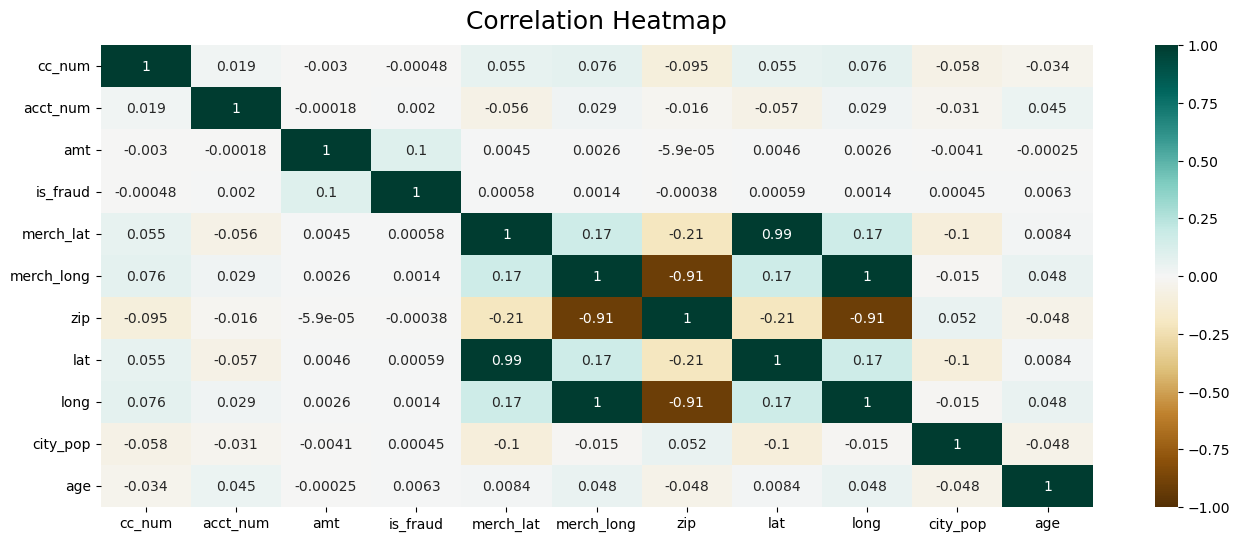

In [11]:
plt.figure(figsize=(16, 6))
heatmap = sns.heatmap(df.corr(),vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);
plt.savefig('heatmap.png', dpi=300, bbox_inches='tight')

In [12]:
df.corr()

,cc_num,acct_num,amt,is_fraud,merch_lat,merch_long,zip,lat,long,city_pop,age
cc_num,1.000000,0.019092,-0.002996,-0.000477,0.054988,0.076356,-0.094624,0.055325,0.076389,-0.057930,-0.034170
acct_num,0.019092,1.000000,-0.000182,0.001997,-0.056388,0.029290,-0.016367,-0.056705,0.029290,-0.030614,0.045401
amt,-0.002996,-0.000182,1.000000,0.100255,0.004494,0.002612,-0.000059,0.004625,0.002625,-0.004137,-0.000249
is_fraud,-0.000477,0.001997,0.100255,1.000000,0.000578,0.001413,-0.000383,0.000590,0.001439,0.000449,0.006339
merch_lat,0.054988,-0.056388,0.004494,0.000578,1.000000,0.168898,-0.207176,0.994487,0.168990,-0.102888,0.008359
merch_long,0.076356,0.029290,0.002612,0.001413,0.168898,1.000000,-0.906805,0.169783,0.999450,-0.014872,0.048008
zip,-0.094624,-0.016367,-0.000059,-0.000383,-0.207176,-0.906805,1.000000,-0.208278,-0.907299,0.052080,-0.047743
lat,0.055325,-0.056705,0.004625,0.000590,0.994487,0.169783,-0.208278,1.000000,0.169877,-0.103464,0.008408
long,0.076389,0.029290,0.002625,0.001439,0.168990,0.999450,-0.907299,0.169877,1.000000,-0.014855,0.048013
city_pop,-0.057930,-0.030614,-0.004137,0.000449,-0.102888,-0.014872,0.052080,-0.103464,-0.014855,1.000000,-0.048317


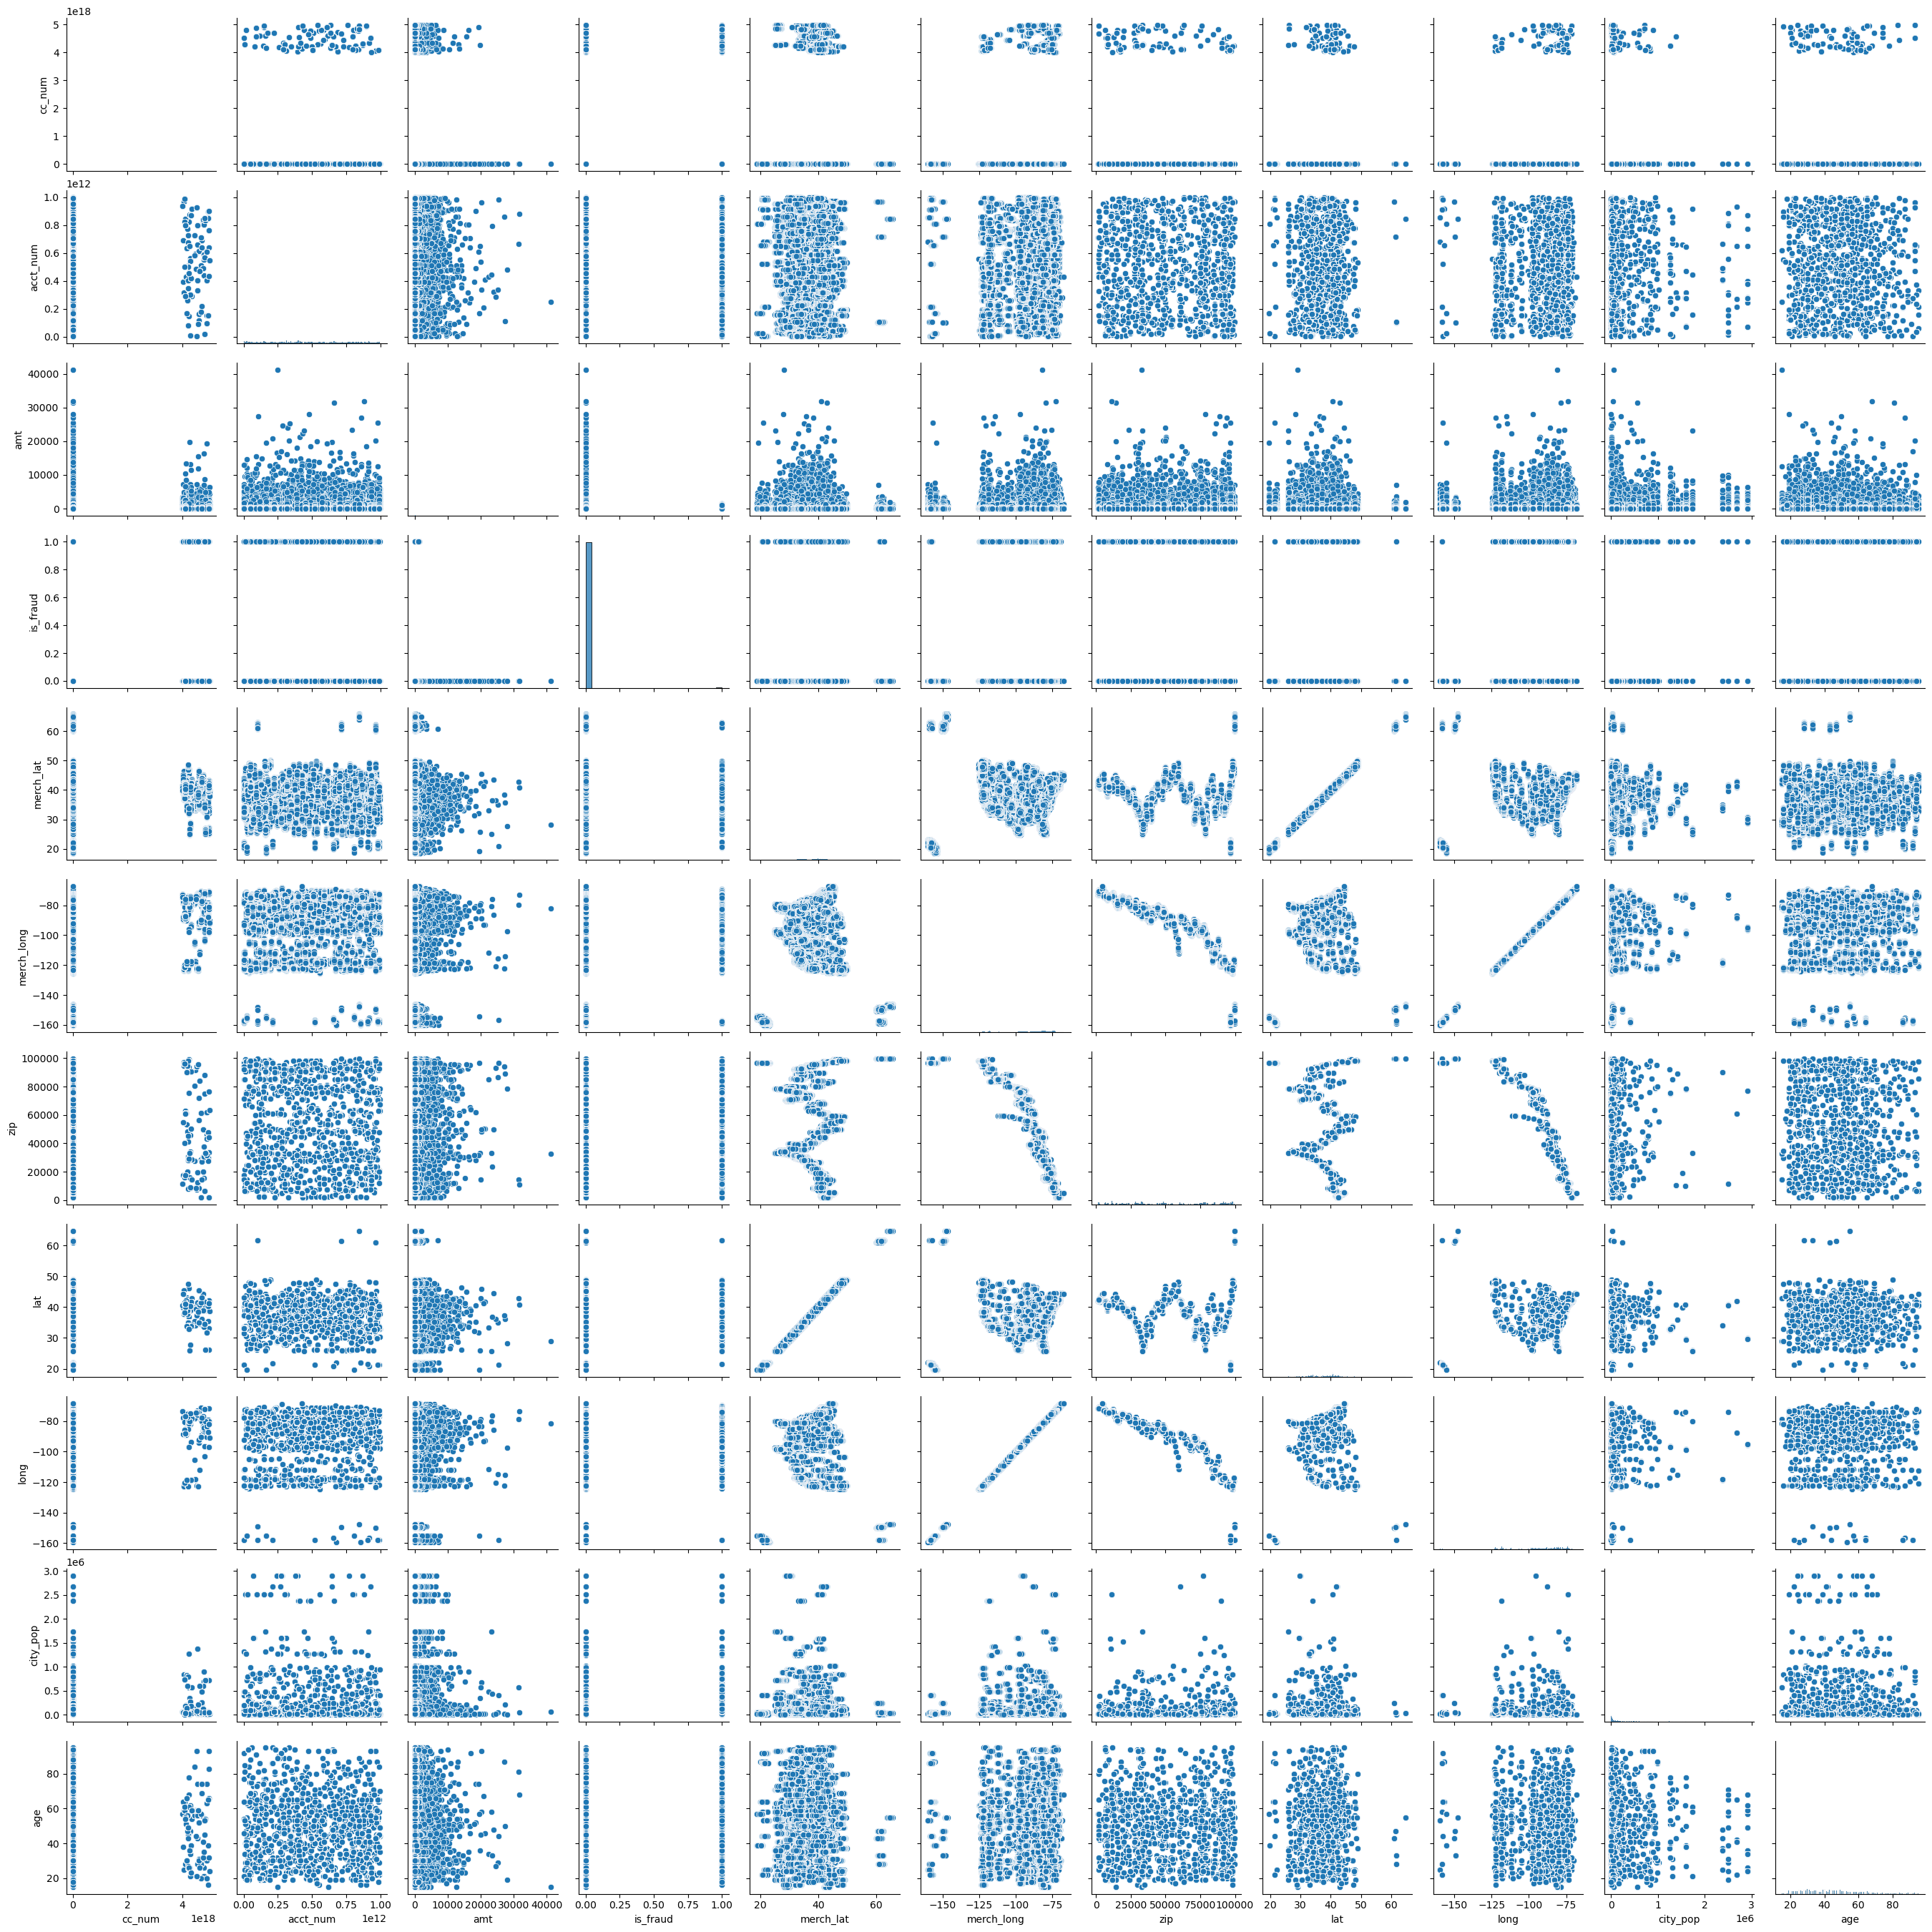

In [13]:
sns.pairplot(df)

# 3.Distribution

### The distribution of categorical variables

In [14]:
# Check the distribution of categorical variables
for col in ['category', 'merchant', 'gender', 'city', 'state', 'job']:
    print(df[col].value_counts(normalize=True))
    print()

shopping_pos      0.098634
home              0.094636
grocery_pos       0.094111
kids_pets         0.087318
gas_transport     0.085717
food_dining       0.075334
entertainment     0.073336
shopping_net      0.072053
personal_care     0.070579
misc_pos          0.066178
health_fitness    0.062425
misc_net          0.044894
grocery_net       0.042623
travel            0.032161
Name: category, dtype: float64

Smith PLC                    0.001346
Johnson LLC                  0.001341
Smith and Sons               0.001324
Smith Inc                    0.001280
Johnson Inc                  0.001230
                               ...   
Santiago-Smith               0.000011
Ray, Michael and Anderson    0.000010
Jackson, King and Smith      0.000010
Graham, Cross and Miller     0.000010
Peterson-Adams               0.000010
Name: merchant, Length: 21977, dtype: float64

F    0.510665
M    0.489335
Name: gender, dtype: float64

Brooklyn       0.017433
Denver         0.008795
Austin         0.00

### The distribution of is_fraud variables

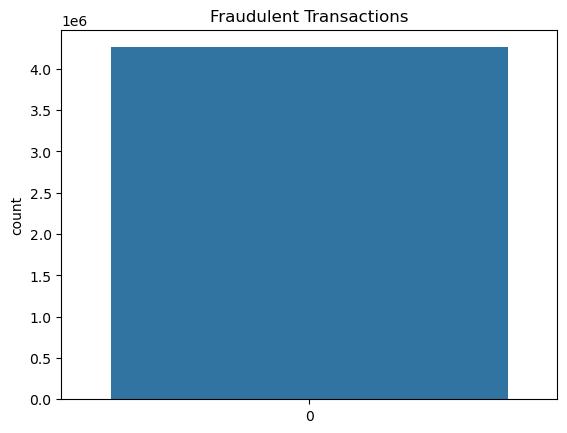

In [15]:
# Check the distribution of the is_fraud columns
sns.countplot(df['is_fraud'])
plt.title('Fraudulent Transactions')
plt.show()

In [16]:
df['is_fraud'].value_counts()

0    4255870
1       5034
Name: is_fraud, dtype: int64

### The distribution of the amt (amount of transaction)

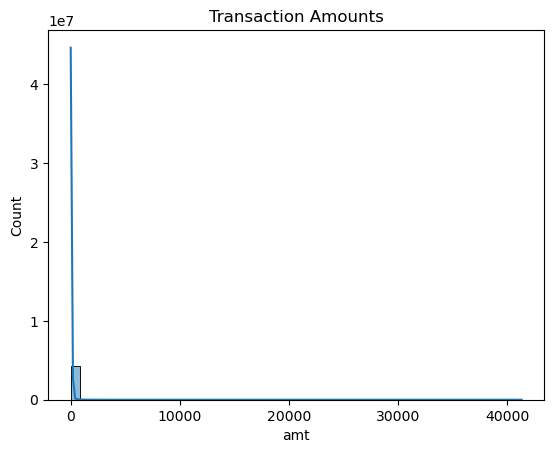

In [18]:
# Check the distribution of the transaction amounts
sns.histplot(df['amt'], bins=50, kde=True)
plt.title('Transaction Amounts')
plt.show()

It seems like we don't have a negative value but some outliers representing very large amount of transaction.

In [19]:
df['amt'].value_counts()

1.02       1879
1.01       1842
1.04       1827
1.10       1821
1.05       1797
           ... 
832.64        1
1260.88       1
1516.35       1
552.11        1
368.59        1
Name: amt, Length: 81218, dtype: int64

In [20]:
df['amt'].describe(percentiles=[.99])

count    4.260904e+06
mean     6.898790e+01
std      1.618467e+02
min      1.000000e+00
50%      4.449000e+01
99%      5.023800e+02
max      4.130053e+04
Name: amt, dtype: float64

# 4.Identify outlier

In [21]:
# Calculate z-score
z_scores = (df['amt'] - df['amt'].mean()) / df['amt'].std()

# Set threshold for z-score outlier detection
z_score_threshold = 3

# Identify outliers using z-score
outliers_z_score = df[np.abs(z_scores) > z_score_threshold]

In [22]:
outliers_z_score

,cc_num,acct_num,trans_num,category,amt,is_fraud,merchant,merch_lat,merch_long,timestamp,gender,city,state,zip,lat,long,city_pop,job,age
698,4218196001337,888022315787,43e6e7bac135bc5fe9d3caf467e46382,entertainment,681.79,0,Allen-Jones,40.515500,-74.341768,2021-01-16 10:50:52-08:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
737,4218196001337,888022315787,bdfc0c54b04b45fb9e634eb857cc9fef,entertainment,756.74,0,"Cortez, Jones and Hood",39.378847,-74.408780,2021-03-10 16:19:58-08:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
760,4218196001337,888022315787,69c2acc62ed43b9c6e223f88d6d75a57,misc_pos,559.92,0,Trujillo-Morrison,40.729906,-74.661889,2020-01-26 11:32:57-08:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
846,4218196001337,888022315787,6b92d3e521d5e08d854ac90dcec1ca3e,grocery_pos,578.90,0,Davis-Hendricks,39.366514,-75.921080,2019-09-08 09:12:59-07:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
904,4218196001337,888022315787,4e19eb55aced557375b66445d5799c76,shopping_pos,928.08,0,"Christian, Rose and Hudson",40.588929,-75.020555,2020-11-21 10:49:33-08:00,M,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,63.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260541,2704390552958068,756767582811,a63dfdf3b5ef31d307f42f29ff244a31,shopping_net,930.47,1,Mason Ltd,33.039509,-116.930325,2022-11-16 03:16:03-08:00,F,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,64.0
4260542,2704390552958068,756767582811,af5000e17ee44dfc2f4778cfe0c1187a,misc_net,1030.61,1,Wheeler-James,34.131538,-117.571405,2022-11-15 04:12:35-08:00,F,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,64.0
4260543,2704390552958068,756767582811,8fc8e2a389c0617d7604b5a000a44f86,shopping_net,883.49,1,Ramos Inc,33.428918,-117.049937,2022-11-16 03:46:00-08:00,F,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,64.0
4260544,2704390552958068,756767582811,6687788b9be63a7444e2f78bc0740e35,shopping_net,933.46,1,Thompson LLC,33.389685,-117.812434,2022-11-16 03:30:42-08:00,F,Temecula,CA,92592,33.4983,-117.0958,114424,Transport planner,64.0


In [23]:
# Remove outliers based on z-score
df_no_outliers = df[np.abs(z_scores) <= z_score_threshold]

In [24]:
df_no_outliers.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4224298 entries, 0 to 4260903
Data columns (total 19 columns):
 #   Column      Dtype  
---  ------      -----  
 0   cc_num      int64  
 1   acct_num    int64  
 2   trans_num   object 
 3   category    object 
 4   amt         float64
 5   is_fraud    int64  
 6   merchant    object 
 7   merch_lat   float64
 8   merch_long  float64
 9   timestamp   object 
 10  gender      object 
 11  city        object 
 12  state       object 
 13  zip         int64  
 14  lat         float64
 15  long        float64
 16  city_pop    int64  
 17  job         object 
 18  age         float64
dtypes: float64(6), int64(5), object(8)
memory usage: 644.6+ MB


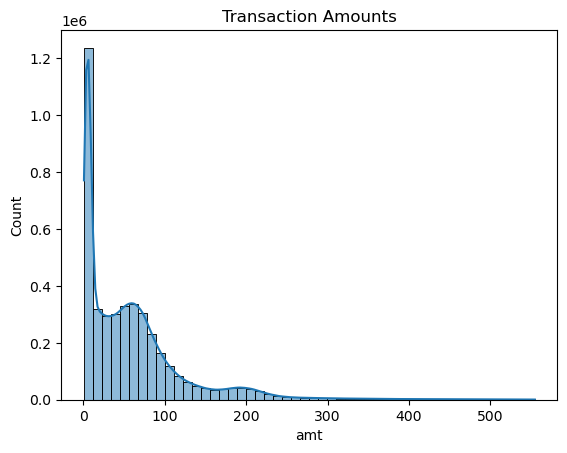

In [25]:
# Check the distribution of the transaction amounts
sns.histplot(df_no_outliers['amt'], bins=50, kde=True)
plt.title('Transaction Amounts')
plt.show()

# 6.Variables selection

The variables selected for training the linear regression model to predict customers' next month spending should be chosen based on their potential influence on customer spending behavior.

- __'acct_num'__: The account number can be used as an identifier for each customer. It helps differentiate individual customers and is useful for aggregating data or tracking customer-specific patterns.

- __'amt'__: The spending amount is the target variable you want to predict. It represents the customer's spending behavior and is essential for training a model to predict future spending.

- __'timestamp'__: The timestamp provides information about when the transaction occurred. It can be used to capture temporal patterns and seasonality in customer spending. For example, it may help identify spending patterns during specific times of the year or recurring events.

- __'age'__: Age is a demographic variable that can provide insights into customer behavior. Different age groups may have distinct spending patterns, and including age as a feature allows the model to capture these potential differences.

- __'gender'__: Gender is another demographic variable that can influence spending behavior. Men and women may have different preferences or spending habits, and including gender as a feature allows the model to consider these distinctions.

- __'job'__: The customer's occupation or job can provide additional context about their financial situation and preferences. Different professions may have varying income levels or spending patterns, and including job as a feature can help capture these nuances.

- __'zip'__: The ZIP code represents the customer's geographical location. Geographical factors, such as the cost of living or local economic conditions, can influence spending behavior. Including ZIP code as a feature allows the model to account for regional variations in spending.


In [28]:
new_df = df_no_outliers[['acct_num', 'amt', 'timestamp','age','gender','job','zip']].copy()

In [29]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4224298 entries, 0 to 4260903
Data columns (total 7 columns):
 #   Column     Dtype  
---  ------     -----  
 0   acct_num   int64  
 1   amt        float64
 2   timestamp  object 
 3   age        float64
 4   gender     object 
 5   job        object 
 6   zip        int64  
dtypes: float64(2), int64(2), object(3)
memory usage: 257.8+ MB


# 7.Data Preparation

### Convert timestamp

In [31]:
# Convert timestamp column to datetime type
new_df['timestamp'] = pd.to_datetime(new_df['timestamp'], utc=True)

# Extract month and year from timestamp
new_df['month'] = new_df['timestamp'].dt.month
new_df['year'] = new_df['timestamp'].dt.year

### Find total spending amount for each month

In [32]:
new_df = new_df.groupby(['acct_num','month','year','job','zip','gender','age'])['amt'].sum().reset_index()


In [33]:
new_df

,acct_num,month,year,job,zip,gender,age,amt
0,2348758451,1,2019,"Surveyor, minerals",14621,M,46.0,3135.11
1,2348758451,1,2020,"Surveyor, minerals",14621,M,46.0,2467.48
2,2348758451,1,2021,"Surveyor, minerals",14621,M,46.0,1753.81
3,2348758451,1,2022,"Surveyor, minerals",14621,M,46.0,7591.70
4,2348758451,2,2019,"Surveyor, minerals",14621,M,46.0,3079.02
...,...,...,...,...,...,...,...,...
43795,999389892260,11,2022,Phytotherapist,63020,M,35.0,5993.18
43796,999389892260,12,2019,Phytotherapist,63020,M,35.0,3183.37
43797,999389892260,12,2020,Phytotherapist,63020,M,35.0,2436.29
43798,999389892260,12,2021,Phytotherapist,63020,M,35.0,2094.13


## Feature Engineering

### Label Encoding

In [34]:
from sklearn.preprocessing import LabelEncoder

# Create a LabelEncoder object
label_encoder = LabelEncoder()

# Fit and transform the "acct_num" column
new_df["acct_num_encoded"] = label_encoder.fit_transform(new_df["acct_num"])

new_df["age_encoded"] = label_encoder.fit_transform(new_df["age"])

new_df["gender_encoded"] = label_encoder.fit_transform(new_df["gender"])

new_df["job_encoded"] = label_encoder.fit_transform(new_df["job"])

new_df["zip_encoded"] = label_encoder.fit_transform(new_df["zip"])


### Drop year = 2018 since it only have one month in 2018

In [35]:
new_df = new_df[new_df['year'] != 2018]

In [36]:
new_df.head()

,acct_num,month,year,job,zip,gender,age,amt,acct_num_encoded,age_encoded,gender_encoded,job_encoded,zip_encoded
0,2348758451,1,2019,"Surveyor, minerals",14621,M,46.0,3135.11,0,31,1,451,127
1,2348758451,1,2020,"Surveyor, minerals",14621,M,46.0,2467.48,0,31,1,451,127
2,2348758451,1,2021,"Surveyor, minerals",14621,M,46.0,1753.81,0,31,1,451,127
3,2348758451,1,2022,"Surveyor, minerals",14621,M,46.0,7591.70,0,31,1,451,127
4,2348758451,2,2019,"Surveyor, minerals",14621,M,46.0,3079.02,0,31,1,451,127


In [37]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 43242 entries, 0 to 43799
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_num          43242 non-null  int64  
 1   month             43242 non-null  int64  
 2   year              43242 non-null  int64  
 3   job               43242 non-null  object 
 4   zip               43242 non-null  int64  
 5   gender            43242 non-null  object 
 6   age               43242 non-null  float64
 7   amt               43242 non-null  float64
 8   acct_num_encoded  43242 non-null  int64  
 9   age_encoded       43242 non-null  int64  
 10  gender_encoded    43242 non-null  int32  
 11  job_encoded       43242 non-null  int32  
 12  zip_encoded       43242 non-null  int64  
dtypes: float64(2), int32(2), int64(7), object(2)
memory usage: 4.3+ MB


# 8.Data Split

In [40]:
X = new_df[['acct_num_encoded','year','month','age_encoded','gender_encoded','job_encoded','zip_encoded']]
y = new_df['amt']

# Create a mask to filter the data
train_mask = new_df['year'] < 2022

# Split the data into training and testing sets based on the mask
X_train = X[train_mask]
y_train = y[train_mask]

X_test = X[~train_mask]
y_test = y[~train_mask]

In [41]:
X_train

,acct_num_encoded,year,month,age_encoded,gender_encoded,job_encoded,zip_encoded
0,0,2019,1,31,1,451,127
1,0,2020,1,31,1,451,127
2,0,2021,1,31,1,451,127
4,0,2019,2,31,1,451,127
5,0,2020,2,31,1,451,127
...,...,...,...,...,...,...,...
43793,982,2020,11,20,1,341,564
43794,982,2021,11,20,1,341,564
43796,982,2019,12,20,1,341,564
43797,982,2020,12,20,1,341,564


### Scale the training and testing data

In [42]:
from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data
scaler.fit(X_train)

# Scale the training and testing data
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [43]:
X_test

array([[-1.73469187,  2.44960616, -1.59310962, ...,  1.00025345,
         1.30610591, -1.24488733],
       [-1.73469187,  2.44960616, -1.30342329, ...,  1.00025345,
         1.30610591, -1.24488733],
       [-1.73469187,  2.44960616, -1.01373697, ...,  1.00025345,
         1.30610591, -1.24488733],
       ...,
       [ 1.73896831,  2.44960616,  1.01406732, ...,  1.00025345,
         0.56957434,  0.35389974],
       [ 1.73896831,  2.44960616,  1.30375365, ...,  1.00025345,
         0.56957434,  0.35389974],
       [ 1.73896831,  2.44960616,  1.59343998, ...,  1.00025345,
         0.56957434,  0.35389974]])

In [44]:
X_train

array([[-1.73469187e+00, -1.22457030e+00, -1.59310962e+00, ...,
         1.00025345e+00,  1.30610591e+00, -1.24488733e+00],
       [-1.73469187e+00,  1.55185693e-04, -1.59310962e+00, ...,
         1.00025345e+00,  1.30610591e+00, -1.24488733e+00],
       [-1.73469187e+00,  1.22488067e+00, -1.59310962e+00, ...,
         1.00025345e+00,  1.30610591e+00, -1.24488733e+00],
       ...,
       [ 1.73896831e+00, -1.22457030e+00,  1.59343998e+00, ...,
         1.00025345e+00,  5.69574335e-01,  3.53899738e-01],
       [ 1.73896831e+00,  1.55185693e-04,  1.59343998e+00, ...,
         1.00025345e+00,  5.69574335e-01,  3.53899738e-01],
       [ 1.73896831e+00,  1.22488067e+00,  1.59343998e+00, ...,
         1.00025345e+00,  5.69574335e-01,  3.53899738e-01]])

In [45]:
y_train

0        3135.11
1        2467.48
2        1753.81
4        3079.02
5        2998.80
          ...   
43793    1167.80
43794    1113.45
43796    3183.37
43797    2436.29
43798    2094.13
Name: amt, Length: 31568, dtype: float64

In [46]:
y_test

3         7591.70
7         5870.37
11        8034.78
15        7094.84
19        6910.35
           ...   
43783     6558.28
43787     5536.86
43791     7992.13
43795     5993.18
43799    12715.96
Name: amt, Length: 11674, dtype: float64

In [47]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(31568, 7)
(31568,)
(11674, 7)
(11674,)


# 9.Training the model

In [48]:
from sklearn import metrics
from sklearn.model_selection import cross_val_score

def cross_val(model):
    pred = cross_val_score(model, X, y, cv=10)
    return pred.mean()

def print_evaluate(true, predicted):  
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    print('MAE:', mae)
    print('MSE:', mse)
    print('RMSE:', rmse)
    print('R2 Square', r2_square)
    
def evaluate(true, predicted):
    mae = metrics.mean_absolute_error(true, predicted)
    mse = metrics.mean_squared_error(true, predicted)
    rmse = np.sqrt(metrics.mean_squared_error(true, predicted))
    r2_square = metrics.r2_score(true, predicted)
    return mae, mse, rmse, r2_square

## Assess Baseline

In [49]:
# Calculate the average of the target variable
y_mean = y_train.mean()

# Create a numpy array called y_base filled with this value
y_base = np.full(y_train.shape, y_mean)

In [50]:
# Import the RMSE and MAE from sklearn
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae

print('Baseline evaluation')
print_evaluate(y_train, y_base)

Baseline evaluation
MAE: 2735.260834947447
MSE: 15438338.806737069
RMSE: 3929.1651539146415
R2 Square 0.0


## Linear regression

In [52]:
# Import the linear regression module from sklearn
from sklearn.linear_model import LinearRegression

# Instantiate the LinearRegression class into a variable called reg1
reg1 = LinearRegression()
# Fit the model with the prepared data
reg1.fit(X_train, y_train)

LinearRegression()

In [53]:
# Calculate the RMSE and MAE between the target variable and the predictions
y_train_preds = reg1.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, y_train_preds)

Train set evaluation
MAE: 2557.899875560546
MSE: 12723292.74307795
RMSE: 3566.972489812327
R2 Square 0.17586387354540445


In [54]:
# Display the RMSE and MAE scores on the testing set
y_test_preds = reg1.predict(X_test)

print('Test set evaluation')
print_evaluate(y_test, y_test_preds)

Test set evaluation
MAE: 5082.510375873918
MSE: 47836819.0356938
RMSE: 6916.416632599124
R2 Square -0.5772333502149367


# Regularization

## Lasso Model

In [56]:
# Import the Lasso regression module from sklearn
from sklearn.linear_model import Lasso 

# Instantiate the LinearRegression class into a variable called lasso_reg
lasso_reg = Lasso(alpha=0.1, 
              precompute=True,  
              positive=True, 
              selection='random',
              random_state=42)

# Fit the model on the training set
lasso_reg = lasso_reg.fit(X_train, y_train)

In [57]:
y_train_preds_lass = lasso_reg.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, y_train_preds_lass)

Train set evaluation
MAE: 2668.9001658043253
MSE: 14849178.526467336
RMSE: 3853.4631860791583
R2 Square 0.03816215511559007


In [58]:
# Display the MSE and MAE scores on the testing set
y_test_preds_lass = lasso_reg.predict(X_test)

print('Test set evaluation')
print_evaluate(y_test, y_test_preds_lass)

Test set evaluation
MAE: 4189.597838591547
MSE: 38562966.92950329
RMSE: 6209.908769821284
R2 Square -0.2714640887611046


## Ridge Model

In [60]:
# Import the Ridge regression module from sklearn
from sklearn.linear_model import Ridge

# Instantiate the Ridge model into a variable called ridge_reg and fit it on the training set
ridge_reg = Ridge(alpha=100, solver='cholesky', tol=0.0001, random_state=42)
ridge_reg.fit(X_train, y_train)

Ridge(alpha=100, random_state=42, solver='cholesky')

In [61]:
# Print the MSE and MAE scores for the training set
y_train_preds_rid = ridge_reg.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, y_train_preds_rid)

Train set evaluation
MAE: 2557.2652121677097
MSE: 12723323.647038687
RMSE: 3566.9768217691976
R2 Square 0.1758618717781727


In [62]:
# Print the MSE and MAE scores for the testing set
y_test_preds_rid = ridge_reg.predict(X_test)

print('Test set evaluation')
print_evaluate(y_test, y_test_preds_rid)

Test set evaluation
MAE: 5078.197921489884
MSE: 47795498.01718626
RMSE: 6913.428817684193
R2 Square -0.5758709500853145


## ElasticNet Model

In [64]:
# Import the ElasticNet module from sklearn
from sklearn.linear_model import ElasticNet 

# Instantiate the ElasticNet class into a variable called elasticnet_reg and fit it on the training set
elasticnet_reg = ElasticNet(alpha=0.1, l1_ratio=0.9, selection='random', random_state=42)
elasticnet_reg.fit(X_train, y_train)

ElasticNet(alpha=0.1, l1_ratio=0.9, random_state=42, selection='random')

In [65]:
# Print the MSE and MAE scores for the training set
y_train_preds_EN = elasticnet_reg.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, y_train_preds_EN)

Train set evaluation
MAE: 2555.907288323902
MSE: 12723603.326364076
RMSE: 3567.016025526669
R2 Square 0.1758437558831344


In [66]:
# Print the RMSE and MAE scores for the testing set
y_test_preds_EN = elasticnet_reg.predict(X_test)

print('Test set evaluation')
print_evaluate(y_test, y_test_preds_EN)

Test set evaluation
MAE: 5068.825732042384
MSE: 47705776.45248126
RMSE: 6906.936835709536
R2 Square -0.5729127298913546


## Decision Tree

In [68]:
from sklearn.tree import DecisionTreeRegressor

# Initialize the Decision Tree regressor
tree = DecisionTreeRegressor()

# Train the model
tree.fit(X_train, y_train)

DecisionTreeRegressor()

In [69]:
# Make predictions on the training and testing set
y_train_pred_tr = tree.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, y_train_pred_tr)

Train set evaluation
MAE: 0.0
MSE: 0.0
RMSE: 0.0
R2 Square 1.0


In [70]:
y_test_pred_tr = tree.predict(X_test)

print('Test set evaluation')
print_evaluate(y_test, y_test_pred_tr)

Test set evaluation
MAE: 4084.4795665581637
MSE: 30376893.632428117
RMSE: 5511.5237124073155
R2 Square -0.0015601095308592772


## Random Forest with n_estimators = 100

In [72]:
from sklearn.ensemble import RandomForestRegressor

# Train the Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [73]:
train_pred_rf = rf_model.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, train_pred_rf)

Train set evaluation
MAE: 328.31544593258985
MSE: 300892.9876534941
RMSE: 548.5371342520888
R2 Square 0.9805100152665267


In [74]:
# Predict on the test set
test_pred_rf = rf_model.predict(X_test)

print('Train set evaluation')
print_evaluate(y_test, test_pred_rf)

Train set evaluation
MAE: 4010.282987750557
MSE: 29771176.12051754
RMSE: 5456.296923786089
R2 Square 0.018411073333154504


## Random Forest with GridSearchCV

In [78]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.4196135687579311


In [79]:
rfg_best = grid_search.best_score_

In [81]:
# Make predictions with the best model
y_train_rfg_best = grid_search.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, y_train_rfg_best)

Train set evaluation
MAE: 2130.5159736416604
MSE: 8557185.403276738
RMSE: 2925.266723441939
R2 Square 0.4457185121793994


In [83]:
# Make predictions with the best model
y_test_rfg_best = grid_search.predict(X_test)

print('Test set evaluation')
print_evaluate(y_test, y_test_rfg_best)

Test set evaluation
MAE: 4097.482482182875
MSE: 32914029.668450885
RMSE: 5737.075009833049
R2 Square -0.08521231824192266


# Gradient Boosting model

In [88]:
import xgboost as xgb

# Define the XGBoost regressor
xgb_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=42, ...)

In [89]:
# Make predictions on the test set
y_train_pred_xgb = xgb_model.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, y_train_pred_xgb)

Train set evaluation
MAE: 748.8962160090397
MSE: 1094560.8312406626
RMSE: 1046.21261282813
R2 Square 0.9291011264266974


In [90]:
# Make predictions on the test set
y_pred_xgb = xgb_model.predict(X_test)

print('Test set evaluation')
print_evaluate(y_test, y_pred_xgb)

Test set evaluation
MAE: 4050.591156831919
MSE: 30195447.33709815
RMSE: 5495.038429082926
R2 Square 0.004422377474679995


## Gradient Boosting model with GridSearchCV

In [94]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

# Create a random forest regressor object
rf = RandomForestRegressor(random_state=42)

# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Print the best parameters and score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best parameters: {'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 50}
Best score: 0.4196135687579311


In [98]:
# Make predictions with the best model
y_train_best = grid_search.predict(X_train)

print('Train set evaluation')
print_evaluate(y_train, y_train_best)

Train set evaluation
MAE: 2130.5159736416604
MSE: 8557185.403276738
RMSE: 2925.266723441939
R2 Square 0.4457185121793994


In [100]:
# Make predictions with the best model
y_test_best = grid_search.predict(X_test)

print('Test set evaluation')
print_evaluate(y_test, y_test_best)

Test set evaluation
MAE: 4097.482482182875
MSE: 32914029.668450885
RMSE: 5737.075009833049
R2 Square -0.08521231824192266


# 11.To Predict customer next month total spending

Setting customer's individual data as 'acct_num_encoded': [1],'year': [2022], 'month': [3],'age_encoded': [1],'gender_encoded': [11],'job_encoded': [100],and 'zip_encoded': [1].

In [106]:
# Prepare the input data for prediction
new_data = pd.DataFrame({
    'acct_num_encoded': [1],
    'year' : [2022],
    'month' : [3],
    'age_encoded': [1],
    'gender_encoded': [11],
    'job_encoded': [100],
    'zip_encoded': [1]
})

# Make predictions on the new data
prediction = tree.predict(new_data)

# Print the predicted next month spending
print("Predicted next month spending: $", round(prediction[0], 2))

Predicted next month spending: $ 10756.5


# Reference

https://www.kaggle.com/code/faressayah/practical-introduction-to-10-regression-algorithm

https://www.kaggle.com/code/prashant111/a-guide-on-xgboost-hyperparameters-tuning

https://dataaspirant.com/handle-overfitting-with-regularization/

https://www.datasource.ai/uploads/1e5660e1137e60077935fc8c1b92578e.html